In [1]:
import numpy as np
import qiskit

In [2]:
circ = qiskit.QuantumCircuit(6,5)

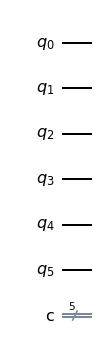

In [3]:
circ.draw('mpl')

In [4]:
circ.rx(0.1*np.pi,range(5))
# circ.h(0)
circ.measure(range(5),range(5))
circ.barrier(range(6))

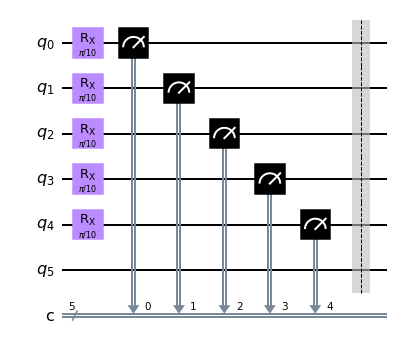

In [5]:
circ.draw('mpl')

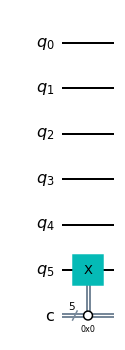

In [6]:
qc = qiskit.QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[6]; // Quantum Register
creg c[5]; // Classical Register
 
if (c==0) x q[5]; // q[5] == 1 means assertion passed
""")
qc.draw('mpl')

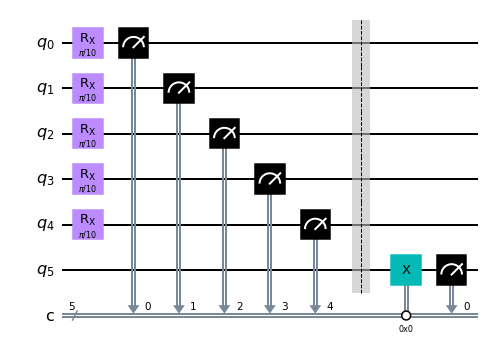

In [7]:
largecirc = circ.compose(qc,range(6),front=False)
largecirc.measure(5,0)
largecirc.draw('mpl')

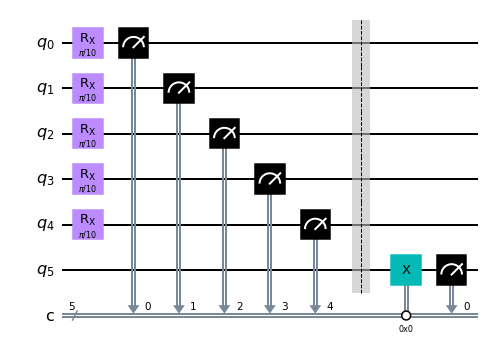

In [8]:
largecirc.draw('mpl')

# Run the circuit

In [9]:
from qiskit.providers.aer import QasmSimulator

In [10]:
backend = QasmSimulator()
circ_compiled = qiskit.transpile(largecirc, backend)

In [11]:
job_sim = backend.run(circ_compiled, shots = 1024)
results_sim = job_sim.result()

In [12]:
counts = results_sim.get_counts(circ_compiled)
print(counts)

{'11000': 2, '00000': 30, '00001': 897, '10010': 1, '01000': 21, '10100': 2, '00010': 25, '10000': 17, '00100': 29}


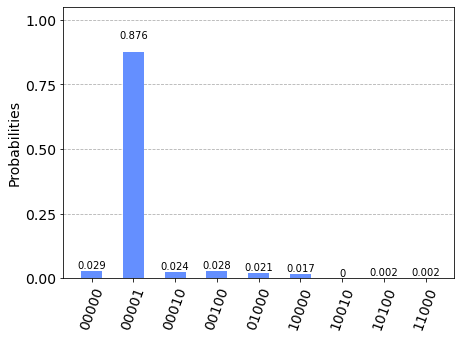

In [13]:
qiskit.visualization.plot_histogram(counts)